In [1]:
# {Basem Shaker}
# {9752 2382 8601 2726}
# {bshaker@kth.se}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import numpy as np
from sklearn import tree
from scipy.stats import zscore
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("TrainOnMe.csv")
print (df)
#df.set_index('id',inplace=True)
#df['id'].is_unique
df.drop('id', inplace=True, axis=1)
df.dropna(inplace=True)
df['x5'] = df['x5'].str.lower()
df['x6'] = df['x6'].str.lower()

y_allowed = ['Bob', 'Atsuto', 'Jörg']
x5_allowed = ['true','false']
x6_allowed = ['a','b','c','d','e','f','fx']    


x5_type = CategoricalDtype(categories=x5_allowed, ordered=True)
x6_type = CategoricalDtype(categories=x6_allowed, ordered=True)

df['y'] = df['y'].astype('category')
df['x5'] = df['x5'].astype(x5_type)
df['x6'] = df['x6'].astype(x6_type)

print(df.x5.unique())
print(df.x6.unique())

df = df[df['y'].isin(y_allowed)]
df = df[df['x5'].isin(x5_allowed)]
df = df[df['x6'].isin(x6_allowed)]

#df['y'] = df['y'].cat.codes
df['x5'] = df['x5'].cat.codes
df['x6'] = df['x6'].cat.codes


print(df.x5.unique())
print(df.x6.unique())

       id       y        x1        x2       x3       x4     x5 x6       x7  \
0       0     Bob  -0.78103  -0.63375 -0.03665  0.27517  False  F -1.85755   
1       1     Bob   0.42649  -0.50019  0.00696  0.11817  False  F -1.73761   
2       2  Atsuto   1.86817  -0.45565  0.07658  0.09662  False  F  1.02798   
3       3  Atsuto  -1.80073   0.08535 -0.02467  0.14032  False  F  2.02793   
4       4     Bob   1.56943  -1.25860 -0.02092  0.22267  False  F -0.43304   
...   ...     ...       ...       ...      ...      ...    ... ..      ...   
996   995  Atsuto   1.44510   0.21567 -0.66888  0.78482  False  F  2.61427   
997   996     Bob   0.27265   0.06493 -0.20490  0.46078  False  F -2.53548   
998   997    Jörg   0.35593  -0.46112 -1.15505  1.32716  False  F  1.86147   
999   998  Atsuto   0.48402   1.44547 -0.26062  0.38700   True  A  0.01803   
1000  999    Jörg   0.33672  -0.00784 -1.07347  1.03648  False  F -0.17967   

           x8       x9      x10  
0     0.22668 -2.35130  1.420

In [5]:
to_float = ['x1','x2','x3','x4','x7','x8','x9','x10']

for column in to_float:
    df[column] = pd.to_numeric(df[column],errors='coerce')

df.dtypes

y      category
x1      float64
x2      float64
x3      float64
x4      float64
x5         int8
x6         int8
x7      float64
x8      float64
x9      float64
x10     float64
dtype: object

In [6]:
Outlier_remove = True
if (Outlier_remove):
    sub_set = df[to_float]
    z_scores = zscore(sub_set)
    abs_z_scores = np.abs(z_scores)
    #print(abs_z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    df = df[filtered_entries]
    #df[(np.abs(zscore(sub_set)) < 3).all(axis=1)]

In [7]:
print(df.head(12))
print(df.shape)
print(df.describe())

         y       x1       x2       x3       x4  x5  x6       x7       x8  \
0      Bob -0.78103 -0.63375 -0.03665  0.27517   1   5 -1.85755  0.22668   
1      Bob  0.42649 -0.50019  0.00696  0.11817   1   5 -1.73761 -1.61015   
2   Atsuto  1.86817 -0.45565  0.07658  0.09662   1   5  1.02798 -0.92326   
3   Atsuto -1.80073  0.08535 -0.02467  0.14032   1   5  2.02793 -0.46318   
4      Bob  1.56943 -1.25860 -0.02092  0.22267   1   5 -0.43304 -1.99881   
5     Jörg  0.14361 -0.37353 -1.01562  1.00364   1   5 -0.05208  0.21060   
6      Bob -0.34399 -1.16045  0.21745  0.07107   1   5 -0.67029  0.03244   
7      Bob -0.05407 -0.47607 -0.56841  0.65207   1   5 -1.85532 -0.63706   
8   Atsuto -0.71673 -0.27256 -0.38471  0.50048   1   5 -1.40870  1.59564   
9      Bob -0.13301  0.31355 -0.92791  0.88101   1   5  0.25196 -0.25724   
10  Atsuto -1.12513 -0.24434 -0.94695  0.95083   1   5  0.06075 -0.87900   
11     Bob  0.78906  0.40426 -0.00116  0.10488   0   4 -0.82565 -2.05912   

         x9

In [8]:
print(df.y.unique())
print(df.x5.unique())
print(df.x6.unique())

['Bob', 'Atsuto', 'Jörg']
Categories (3, object): ['Bob', 'Atsuto', 'Jörg']
[1 0]
[5 4 0 3 1 6 2]


In [9]:
array = df.values

X = array[:,1:]
Y = array[:,0]
Y=Y.astype(str)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [10]:
print("Atsuto count: ", np.count_nonzero(Y == 'Atsuto'), '-' ,round(np.count_nonzero(Y == 'Atsuto')/len(Y)*100,1), '%')
print("Bob count: ", np.count_nonzero(Y == 'Bob'), '-' ,round(np.count_nonzero(Y == 'Bob')/len(Y)*100,1), '%')
print("Jörg count: ", np.count_nonzero(Y == 'Jörg'), '-' ,round(np.count_nonzero(Y == 'Jörg')/len(Y)*100,1), '%')

Atsuto count:  290 - 29.7 %
Bob count:  510 - 52.2 %
Jörg count:  177 - 18.1 %


In [11]:
# classifier checker
models = []
models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'),[],0,0])
models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis(),[],0,0])
models.append(['K Nearest Neighbor', KNeighborsClassifier(),[],0,0])
models.append(['Decesion Tree Classifier', DecisionTreeClassifier(),[],0,0])
models.append(['Gaussien Naive Bayes', GaussianNB(),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto'),[],0,0])
models.append(['Random Forest', RandomForestClassifier(max_depth = 1000,random_state=1),[],0,0])

models = np.array(models,dtype=object)

for i in range(len(models)):
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(models[i,1], X_train, Y_train, cv=kfold, scoring='accuracy')
    models[i,2] = cv_results
    models[i,3] = cv_results.mean()
    models[i,4] = cv_results.std()
    print('%s: %f (%f)' % (models[i,0], models[i,3], models[i,4]))

best_model= models[np.argmax(models[:,3]),:]
print("the best model performer is: ", best_model[0])

Logistic Regression: 0.809234 (0.029373)
Linear Discriminant Analysis: 0.811847 (0.034421)
K Nearest Neighbor: 0.816975 (0.041719)
Decesion Tree Classifier: 0.784940 (0.035352)
Gaussien Naive Bayes: 0.842535 (0.043951)
Support Vector Machine: 0.850227 (0.030152)
Random Forest: 0.859153 (0.020679)
the best model performer is:  Random Forest


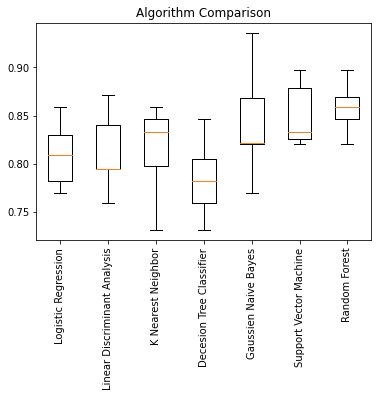

In [12]:
pyplot.boxplot(models[:,2], labels=models[:,0])
pyplot.xticks(rotation=90)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [13]:
model = best_model[1]
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8775510204081632
[[58  2  5]
 [ 5 87  0]
 [11  1 27]]
              precision    recall  f1-score   support

      Atsuto       0.78      0.89      0.83        65
         Bob       0.97      0.95      0.96        92
        Jörg       0.84      0.69      0.76        39

    accuracy                           0.88       196
   macro avg       0.86      0.84      0.85       196
weighted avg       0.88      0.88      0.88       196



In [14]:
df_eval = pd.read_csv("EvaluateOnMe.csv")

df_eval.rename({"Unnamed: 0":"id"}, axis="columns", inplace=True)
df_eval.drop(["id"], axis=1, inplace=True)

df_eval['x5'] = df_eval['x5'].astype(str)
df_eval['x5'] = df_eval['x5'].str.lower()
df_eval['x6'] = df_eval['x6'].str.lower()

df_eval['x5'] = df_eval['x5'].astype(x5_type)
df_eval['x6'] = df_eval['x6'].astype(x6_type)


print(df_eval.x5.unique())
print(df_eval.x6.unique())

df_eval['x5'] = df_eval['x5'].cat.codes
df_eval['x6'] = df_eval['x6'].cat.codes

print(df_eval.x5.unique())
print(df_eval.x6.unique())

['true', 'false']
Categories (2, object): ['true' < 'false']
['e', 'f', 'a', 'fx', 'd', 'b', 'c']
Categories (7, object): ['a' < 'b' < 'c' < 'd' < 'e' < 'f' < 'fx']
[0 1]
[4 5 0 6 3 1 2]


In [15]:
print(df_eval.head(12))
print(df_eval.shape)
print(df_eval.describe())
print(df_eval.dtypes)

         x1       x2       x3       x4  x5  x6       x7       x8       x9  \
0   2.11820  0.30064  0.11441  0.08570   0   4 -0.23694  1.34755  4.41336   
1   0.33456 -0.08190 -0.70144  0.69276   1   5 -0.97349 -1.46992 -3.30673   
2   1.52200 -0.50104 -1.34160  1.28651   1   5  1.59231  1.96883 -1.36040   
3   1.27021  1.24996 -0.14228  0.15172   0   0 -0.28572 -0.85520 -3.86445   
4  -1.91738  0.83558 -0.88311  0.95150   1   0  0.74576  2.59335 -2.41387   
5   2.28692 -0.27930 -1.17053  1.33479   1   5  0.06359  0.29207 -1.53829   
6  -0.01912 -1.43705 -0.26305  0.37385   1   5  1.18986  2.31248 -2.41818   
7  -0.25074  1.14412 -0.09085  0.21013   0   0  2.62449 -1.39934 -1.12511   
8  -0.09932  0.32283 -1.13070  1.21230   1   6  0.68759 -1.37708  1.41127   
9   1.36437  0.54590  0.07690  0.06035   0   3 -0.63347 -1.26079 -2.55929   
10  1.24313  0.61202  0.17274  0.02583   0   1  1.12409 -1.37066  2.76449   
11 -1.21188  0.11738 -0.71427  0.80574   1   5  0.00104 -1.90399 -3.65574   

In [16]:
evaluate_array = df_eval.values
result = model.predict(evaluate_array)
print(result)

['Atsuto' 'Bob' 'Atsuto' 'Bob' 'Atsuto' 'Jörg' 'Atsuto' 'Atsuto' 'Jörg'
 'Bob' 'Atsuto' 'Bob' 'Bob' 'Bob' 'Jörg' 'Bob' 'Bob' 'Jörg' 'Bob' 'Jörg'
 'Bob' 'Jörg' 'Bob' 'Bob' 'Atsuto' 'Bob' 'Jörg' 'Atsuto' 'Atsuto' 'Atsuto'
 'Bob' 'Bob' 'Bob' 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto' 'Bob' 'Atsuto'
 'Bob' 'Bob' 'Jörg' 'Atsuto' 'Bob' 'Jörg' 'Bob' 'Bob' 'Jörg' 'Atsuto'
 'Atsuto' 'Atsuto' 'Bob' 'Atsuto' 'Atsuto' 'Atsuto' 'Bob' 'Bob' 'Jörg'
 'Bob' 'Jörg' 'Bob' 'Bob' 'Bob' 'Bob' 'Atsuto' 'Jörg' 'Jörg' 'Atsuto'
 'Jörg' 'Jörg' 'Bob' 'Bob' 'Jörg' 'Bob' 'Atsuto' 'Bob' 'Bob' 'Bob' 'Bob'
 'Bob' 'Jörg' 'Jörg' 'Atsuto' 'Bob' 'Bob' 'Bob' 'Jörg' 'Bob' 'Atsuto'
 'Jörg' 'Jörg' 'Bob' 'Bob' 'Bob' 'Bob' 'Bob' 'Atsuto' 'Bob' 'Jörg'
 'Atsuto' 'Bob' 'Bob' 'Atsuto' 'Bob' 'Bob' 'Bob' 'Atsuto' 'Bob' 'Bob'
 'Bob' 'Bob' 'Jörg' 'Jörg' 'Atsuto' 'Jörg' 'Bob' 'Jörg' 'Bob' 'Bob'
 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto' 'Atsuto'
 'Bob' 'Jörg' 'Bob' 'Bob' 'Bob' 'Atsuto' 'Atsuto' 'Bob' 'Atsuto' 'Atsuto'
 'Jö

In [17]:
with open("106715.txt", "w") as outfile:
    outfile.write("\n".join(result))

In [18]:
print("Atsuto count: ", np.count_nonzero(result == 'Atsuto'), '-' ,round(np.count_nonzero(result == 'Atsuto')/len(result)*100,1), '%')
print("Bob count: ", np.count_nonzero(result == 'Bob'), '-' ,round(np.count_nonzero(result == 'Bob')/len(result)*100,1), '%')
print("Jörg count: ", np.count_nonzero(result == 'Jörg'), '-' ,round(np.count_nonzero(result == 'Jörg')/len(result)*100,1), '%')

Atsuto count:  3223 - 32.2 %
Bob count:  5066 - 50.7 %
Jörg count:  1711 - 17.1 %
